In [223]:
from wordcloud import WordCloud
import pickle
import re
import pandas as pd
import numpy as np
from collections import Counter,defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

In [2]:
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel


# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary

In [3]:
t2c = pickle.load(open("topics_to_coherence_bak.pickle","rb"))

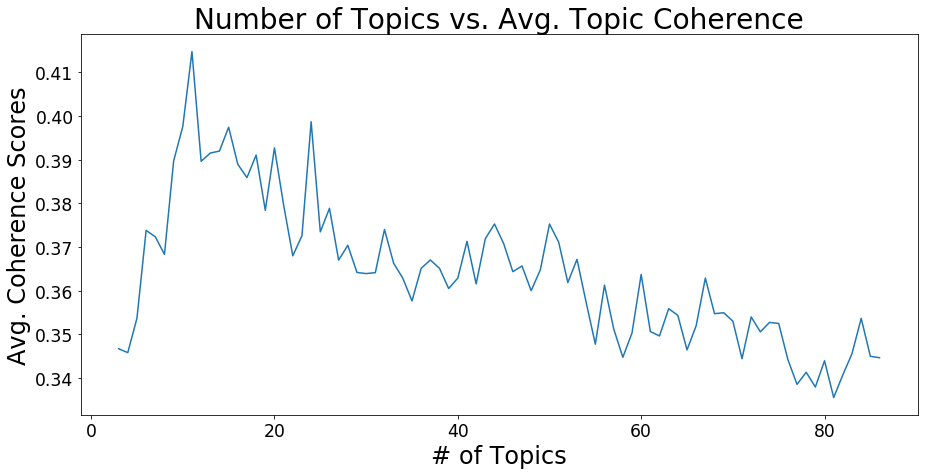

In [301]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (15, 7),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
          'text.usetex': False,
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)
ax = sns.lineplot(x=[c for c in t2c],y=[t2c[c] for c in t2c])
ax.set_xlabel("# of Topics",fontsize=24)
ax.set_ylabel("Avg. Coherence Scores",fontsize=24)
ax.set_title("Number of Topics vs. Avg. Topic Coherence",fontsize=28)
plt.show()

In [220]:
print("\n".join("{:2d}-topics (avg. topic coherence={:5.3f})".format(k,t2c[k]) for k in sorted(t2c,key=lambda k:t2c[k],reverse=True)[:10]))

11-topics (avg. topic coherence=0.415)
24-topics (avg. topic coherence=0.399)
10-topics (avg. topic coherence=0.398)
15-topics (avg. topic coherence=0.397)
20-topics (avg. topic coherence=0.393)
14-topics (avg. topic coherence=0.392)
13-topics (avg. topic coherence=0.391)
18-topics (avg. topic coherence=0.391)
 9-topics (avg. topic coherence=0.390)
12-topics (avg. topic coherence=0.390)


In [221]:
pd.DataFrame([[k,t2c[k]] for k in sorted(t2c,key=lambda k:t2c[k],reverse=True)],columns=["Number of Topics","Avg. Coherence Score"])

Number of Topics  Avg. Coherence Score
0                 11              0.414709
1                 24              0.398662
2                 10              0.397591
3                 15              0.397417
4                 20              0.392689
5                 14              0.391952
6                 13              0.391500
7                 18              0.391039
8                  9              0.389673
9                 12              0.389622
10                16              0.388928
11                17              0.385883
12                21              0.379586
13                26              0.378856
14                19              0.378395
15                44              0.375274
16                50              0.375262
17                32              0.374018
18                 6              0.373814
19                25              0.373471
20                23              0.372609
21                 7              0.372347
22                43              0.371907
23                41              0.371313
24                51              0.371123
25                45              0.370791
26                28              0.370398
27                 8              0.368321
28                22              0.367996
29                53              0.367179
..               ...                   ...
54                68              0.354760
55                64              0.354376
56                72              0.354021
57                 5              0.353729
58                84              0.353691
59                70              0.353059
60                74              0.352762
61                75              0.352520
62                66              0.352022
63                57              0.351301
64                61              0.350680
65                73              0.350604
66                59              0.350337
67                62              0.349666
68                55              0.347786
69                 3              0.346740
70                65              0.346465
71                 4              0.345851
72                83              0.345628
73                85              0.345018
74                58              0.344786
75                86              0.344688
76                71              0.344463
77                76              0.344291
78                80              0.343996
79                78              0.341355
80                82              0.340768
81                77              0.338587
82                79              0.337988
83                81              0.335587

[84 rows x 2 columns]

In [6]:
start = time()
texts = pickle.load(open("texts.pickle","rb"))
corpus = pickle.load(open("corpus.pickle","rb"))
id2word = pickle.load(open("id2word.pickle","rb"))
end = time()
print("took {} seconds".format(end-start))

took 2.8079802989959717 seconds


In [8]:
best_model = pickle.load(open("lda_mp_11_topics_55295_songs.pickle","rb"))

In [9]:
coherence_model = CoherenceModel(model=best_model, texts=texts, dictionary=id2word, coherence='c_v')
print("coherence = {}".format(coherence_model.get_coherence()))

coherence = 0.4147088692339334


In [10]:
start = time()
vis = pyLDAvis.gensim.prepare(best_model, corpus, id2word)
end = time()
print("took {} seconds".format(end-start))

c:\users\craut\miniconda3\envs\music_econ\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


took 381.4230682849884 seconds


In [11]:
pyLDAvis.enable_notebook()
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.113787 -0.087630       1        1  19.693119
7     -0.030280  0.127791       2        1  15.642049
2     -0.094169 -0.117987       3        1  13.875371
10    -0.063683 -0.214570       4        1  10.712963
6     -0.078775  0.072537       5        1   9.862977
1     -0.060812  0.055582       6        1   8.407601
0     -0.026462  0.073642       7        1   5.872407
4     -0.039425  0.011751       8        1   5.353014
9      0.014383  0.250914       9        1   5.115526
5     -0.051542 -0.118605      10        1   4.042621
8      0.544552 -0.053425      11        1   1.422344, topic_info=     Category           Freq       Term          Total  loglift  logprob
62    Default  167034.000000       love  167034.000000  30.0000  30.0000
74    Default   94931.000000         oh   94931.000000  29.0000  29.0000
110   Default   83332.000000       yeah   83332.000000  28.0000  28.0000
38    Default   55924.000000       girl   55924.000000  27.0000  27.0000
184   Default   41528.000000      gonna   41528.000000  26.0000  26.0000
661   Default   22750.000000         la   22750.000000  25.0000  25.0000
8     Default   89352.000000       baby   89352.000000  24.0000  24.0000
37    Default  182557.000000        get  182557.000000  23.0000  23.0000
537   Default   60984.000000       want   60984.000000  22.0000  22.0000
59    Default   64357.000000        let   64357.000000  21.0000  21.0000
71    Default   37618.000000      night   37618.000000  20.0000  20.0000
51    Default  159701.000000        i'm  159701.000000  19.0000  19.0000
113   Default   42581.000000      wanna   42581.000000  18.0000  18.0000
48    Default   27158.000000        hey   27158.000000  17.0000  17.0000
77    Default   22620.000000        ooh   22620.000000  16.0000  16.0000
921   Default   19661.000000      dance   19661.000000  15.0000  15.0000
205   Default   17319.000000    tonight   17319.000000  14.0000  14.0000
125   Default   75525.000000       come   75525.000000  13.0000  13.0000
70    Default   24481.000000      nigga   24481.000000  12.0000  12.0000
60    Default  110875.000000       like  110875.000000  11.0000  11.0000
39    Default  106455.000000         go  106455.000000  10.0000  10.0000
594   Default   12284.000000         na   12284.000000   9.0000   9.0000
16    Default   20051.000000        boy   20051.000000   8.0000   8.0000
171   Default   17139.000000      we're   17139.000000   7.0000   7.0000
198   Default   14393.000000       rock   14393.000000   6.0000   6.0000
31    Default   59375.000000       feel   59375.000000   5.0000   5.0000
85    Default   81547.000000        say   81547.000000   4.0000   4.0000
187   Default   30122.000000     little   30122.000000   3.0000   3.0000
321   Default   29774.000000       good   29774.000000   2.0000   2.0000
46    Default   35254.000000      heart   35254.000000   1.0000   1.0000
...       ...            ...        ...            ...      ...      ...
5573  Topic11     615.737244        mow     616.662476   4.2514  -5.2049
2240  Topic11     593.516296    dreamer     594.441833   4.2513  -5.2417
4179  Topic11     558.551086        una     559.476257   4.2512  -5.3024
2275  Topic11     514.001953       como     514.927124   4.2511  -5.3855
4651  Topic11     503.177002    runaway     504.102234   4.2510  -5.4068
2286  Topic11     464.846283       para     465.771454   4.2509  -5.4861
4176  Topic11     438.596558         ti     439.521729   4.2508  -5.5442
6243  Topic11     424.863647       ella     425.788849   4.2507  -5.5760
4839  Topic11     422.510284    spanish     423.435547   4.2507  -5.5815
4187  Topic11     386.227234       dale     387.152435   4.2505  -5.6713
4152  Topic11     386.128937     cuerpo     387.054108   4.2505  -5.6716
6498  Topic11     385.940521        oom     386.865753   4.2505  -5.6721
5430  Topic11     356.154938         su    

In [324]:
i_2_cat_title

defaultdict(str,
            {1: 'Country',
             3: 'Psyche/Regret',
             4: 'People',
             5: 'Craze/Party',
             7: 'Hip-Hop',
             8: 'Foreign Songs',
             9: 'Noise/Sounds',
             10: 'World/Earth',
             0: 'Dance/Rhythm',
             2: 'Affection',
             6: 'Desire'})

In [12]:
def format_topics_sentences(ldamodel, corpus=corpus, texts=texts):
    # Init output
    
    data  = []
    sent_topics_df = pd.DataFrame()
    
    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        topics = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        dom_topic,perc_contr = topics[0]
        word_topic_effects = [(prop,id2word[wi]) for wi,tp in row[2] for t,prop in tp if t == dom_topic]
        word_topic_effects.sort(reverse=True)
        data.append([i,dom_topic,perc_contr,word_topic_effects])
    sent_topics_df = pd.DataFrame(data,columns = ['Song_ID','Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords'])

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [14]:
song_data_df = format_topics_sentences(best_model)
song_data_df.head()

Song_ID  Dominant_Topic  Perc_Contribution  \
0        0               7           0.588035   
1        1               7           0.605701   
2        2               7           0.635930   
3        3               0           0.639685   
4        4               0           0.637666   

                                      Topic_Keywords  \
0  [(17.885664, sauce), (17.493374, ain't), (13.9...   
1  [(18.020464, ain't), (17.897146, sauce), (14.1...   
2  [(11.952904, sauce), (9.647017, ain't), (9.068...   
3  [(15.9680805, ooh-ooh-ooh), (12.635383, sing),...   
4  [(15.96798, ooh-ooh-ooh), (11.663578, sing), (...   

                                                   0  
0  [sauce, ayy, sauce, ayy, sauce, ayy, go, numb,...  
1  [sauce, ayy, sauce, ayy, sauce, ayy, love, i'm...  
2  [sauce, aye, sauce, aye, sauce, aye, go, dumb,...  
3  [barb, wire, fence, carve, hillside, cut, hole...  
4  [barb, wire, fence, carve, hillside, cut, hole...

In [15]:
vis.topic_order

[4, 8, 3, 11, 7, 2, 1, 5, 10, 6, 9]

In [40]:
# because the vis topic order is on many orders of wrong...
model_topics_2_vis_topic = [7,6,3,1,8,10,5,2,11,9,4]

In [27]:
vis.topic_info

Category           Freq       Term          Total  loglift  logprob
62    Default  167034.000000       love  167034.000000  30.0000  30.0000
74    Default   94931.000000         oh   94931.000000  29.0000  29.0000
110   Default   83332.000000       yeah   83332.000000  28.0000  28.0000
38    Default   55924.000000       girl   55924.000000  27.0000  27.0000
184   Default   41528.000000      gonna   41528.000000  26.0000  26.0000
661   Default   22750.000000         la   22750.000000  25.0000  25.0000
8     Default   89352.000000       baby   89352.000000  24.0000  24.0000
37    Default  182557.000000        get  182557.000000  23.0000  23.0000
537   Default   60984.000000       want   60984.000000  22.0000  22.0000
59    Default   64357.000000        let   64357.000000  21.0000  21.0000
71    Default   37618.000000      night   37618.000000  20.0000  20.0000
51    Default  159701.000000        i'm  159701.000000  19.0000  19.0000
113   Default   42581.000000      wanna   42581.000000  18.0000  18.0000
48    Default   27158.000000        hey   27158.000000  17.0000  17.0000
77    Default   22620.000000        ooh   22620.000000  16.0000  16.0000
921   Default   19661.000000      dance   19661.000000  15.0000  15.0000
205   Default   17319.000000    tonight   17319.000000  14.0000  14.0000
125   Default   75525.000000       come   75525.000000  13.0000  13.0000
70    Default   24481.000000      nigga   24481.000000  12.0000  12.0000
60    Default  110875.000000       like  110875.000000  11.0000  11.0000
39    Default  106455.000000         go  106455.000000  10.0000  10.0000
594   Default   12284.000000         na   12284.000000   9.0000   9.0000
16    Default   20051.000000        boy   20051.000000   8.0000   8.0000
171   Default   17139.000000      we're   17139.000000   7.0000   7.0000
198   Default   14393.000000       rock   14393.000000   6.0000   6.0000
31    Default   59375.000000       feel   59375.000000   5.0000   5.0000
85    Default   81547.000000        say   81547.000000   4.0000   4.0000
187   Default   30122.000000     little   30122.000000   3.0000   3.0000
321   Default   29774.000000       good   29774.000000   2.0000   2.0000
46    Default   35254.000000      heart   35254.000000   1.0000   1.0000
...       ...            ...        ...            ...      ...      ...
5573  Topic11     615.737244        mow     616.662476   4.2514  -5.2049
2240  Topic11     593.516296    dreamer     594.441833   4.2513  -5.2417
4179  Topic11     558.551086        una     559.476257   4.2512  -5.3024
2275  Topic11     514.001953       como     514.927124   4.2511  -5.3855
4651  Topic11     503.177002    runaway     504.102234   4.2510  -5.4068
2286  Topic11     464.846283       para     465.771454   4.2509  -5.4861
4176  Topic11     438.596558         ti     439.521729   4.2508  -5.5442
6243  Topic11     424.863647       ella     425.788849   4.2507  -5.5760
4839  Topic11     422.510284    spanish     423.435547   4.2507  -5.5815
4187  Topic11     386.227234       dale     387.152435   4.2505  -5.6713
4152  Topic11     386.128937     cuerpo     387.054108   4.2505  -5.6716
6498  Topic11     385.940521        oom     386.865753   4.2505  -5.6721
5430  Topic11     356.154938         su     357.080139   4.2503  -5.7524
2297  Topic11     355.185974         tú     356.111145   4.2503  -5.7551
808   Topic11    2064.671143         mi    2102.536133   4.2347  -3.9950
2246  Topic11    2133.468018         lo    2247.782715   4.2007  -3.9623
998   Topic11    2651.165527         ba    3080.396240   4.1028  -3.7450
3119  Topic11     528.546936        wah     543.215820   4.2255  -5.3576
741   Topic11    1340.020142   christma    1518.154663   4.1281  -4.4273
3343  Topic11     546.927429      santa     579.594849   4.1949  -5.3234
539   Topic11    4463.433594      woman    8499.531250   3.6088  -3.2241
3922  Topic11    1721.884033         ay    2863.702393   3.7442  -4.1766
102   Topic11     652.490295         um     788.406128   4.0636

In [39]:
song_data_df[song_data_df["Dominant_Topic"]==0].sort_values("Perc_Contribution",ascending=False)

Song_ID  Dominant_Topic  Perc_Contribution  \
53209    53209               0           0.990721   
53208    53208               0           0.968152   
6254      6254               0           0.967530   
33648    33648               0           0.963289   
17459    17459               0           0.954773   
33647    33647               0           0.953545   
32810    32810               0           0.946520   
3006      3006               0           0.935591   
3005      3005               0           0.935591   
6365      6365               0           0.927119   
6364      6364               0           0.927112   
19695    19695               0           0.924223   
51713    51713               0           0.917974   
44125    44125               0           0.917161   
4069      4069               0           0.900302   
44126    44126               0           0.900217   
24605    24605               0           0.899895   
24604    24604               0           0.899884   
24603    24603               0           0.899731   
53156    53156               0           0.899291   
39844    39844               0           0.886028   
24915    24915               0           0.886028   
39843    39843               0           0.885996   
31421    31421               0           0.883379   
15677    15677               0           0.881422   
39761    39761               0           0.879630   
10944    10944               0           0.877412   
10945    10945               0           0.877407   
39763    39763               0           0.869556   
51714    51714               0           0.863733   
...        ...             ...                ...   
46691    46691               0           0.228505   
39215    39215               0           0.227403   
39214    39214               0           0.227396   
755        755               0           0.226704   
18832    18832               0           0.225736   
38840    38840               0           0.223345   
46738    46738               0           0.216798   
32594    32594               0           0.216525   
46828    46828               0           0.216240   
7128      7128               0           0.215945   
28906    28906               0           0.215547   
28907    28907               0           0.215202   
22427    22427               0           0.213574   
50839    50839               0           0.213238   
50837    50837               0           0.213230   
35775    35775               0           0.211485   
46739    46739               0           0.206789   
14493    14493               0           0.202327   
9038      9038               0           0.202147   
491        491               0           0.200520   
53211    53211               0           0.199977   
19730    19730               0           0.193618   
28048    28048               0           0.190172   
7127      7127               0           0.171589   
40652    40652               0           0.090909   
47671    47671               0           0.090909   
36304    36304               0           0.090909   
36305    36305               0           0.090909   
1883      1883               0           0.090909   
1882      1882               0           0.090909   

                                          Topic_Keywords  \
53209  [(28.999899, go), (7.999982, let), (5.9999423,...   
53208  [(28.860497, go), (7.9846444, let), (5.9971223...   
6254   [(12.999689, low), (4.9990835, whistle), (3.99...   
33648  [(19.97744, freddie), (6.990974, feet), (5.994...   
17459  [(48.998066, clap), (48.76355, hand), (34.9998...   
33647  [(15.979339, freddie), (4.9998827, dance), (4....   
32810  [(7.9999204, get), (3.9999886, let), (3.999941...   
3006   [(31.998709, clap), (23.973429, hand), (23.957...   
3005   [(31.998709, clap), (23.973429, hand), (23.957...   
6365   [(34.811382, let), (18.629051, blow), (0.87444...   
6364   [(34.811356, let), (18.629002, blow), (0.87443...   


In [41]:
def format_topics_sentences2(ldamodel, corpus=corpus, texts=texts):
    # Init output
    
    data  = []
    sent_topics_df = pd.DataFrame()
    
    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        topics = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        for dom_topic,perc_contr in topics:
            word_topic_effects = [(prop,id2word[wi]) for wi,tp in row[2] for t,prop in tp if t == dom_topic]
            word_topic_effects.sort(reverse=True)
            data.append([i,dom_topic,perc_contr,word_topic_effects])
    sent_topics_df = pd.DataFrame(data,columns = ['Song_ID','Topic', 'Perc_Contribution', 'Topic_Keywords'])

    return(sent_topics_df)

In [56]:
song_data_df2 = format_topics_sentences2(best_model)
print(song_data_df2.shape)
song_data_df2.head()

(278353, 4)


Song_ID  Topic  Perc_Contribution  \
0        0      7           0.587990   
1        0      9           0.147487   
2        0      1           0.120625   
3        0      3           0.084174   
4        0      2           0.033491   

                                      Topic_Keywords  
0  [(17.885633, sauce), (17.491978, ain't), (13.9...  
1  [(10.076455, yeah), (9.816668, hey), (5.965515...  
2  [(10.102788, enough), (5.0539594, ain't), (4.0...  
3  [(5.137609, go), (4.189173, much), (3.7142868,...  
4  [(3.163644, enough), (2.064971, much), (0.7847...

In [43]:
def word_cloud_from_cluster(df):
    cols = df.columns.tolist()
    df = df.agg({i: sum for i in cols})
    wc = WordCloud(width=900,height=500, max_words=1628,relative_scaling=1,normalize_plurals=False).generate_from_frequencies({k:df[k] for k in cols if df[k]>0})
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

Default


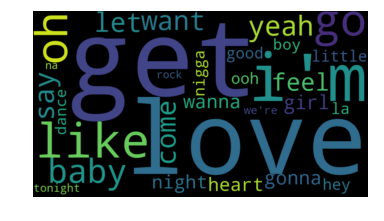

Topic1


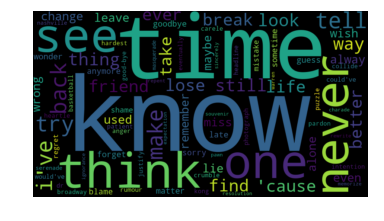

Topic2


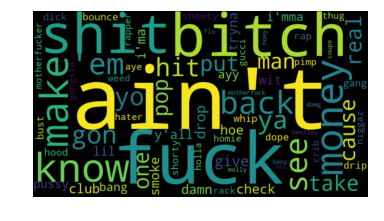

Topic3


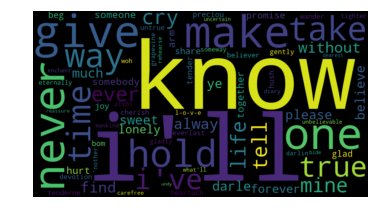

Topic4


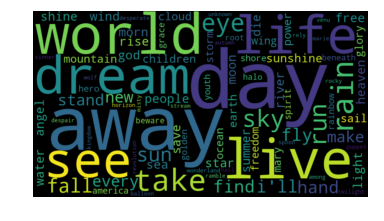

Topic5


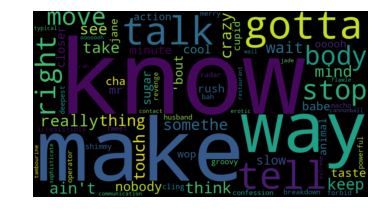

Topic6


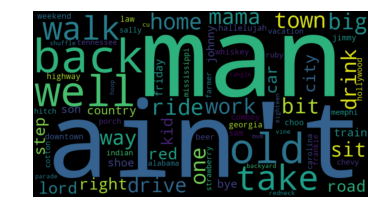

Topic7


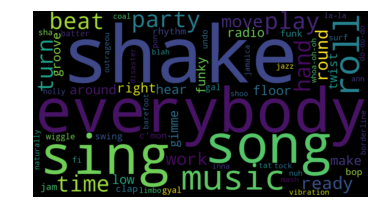

Topic8


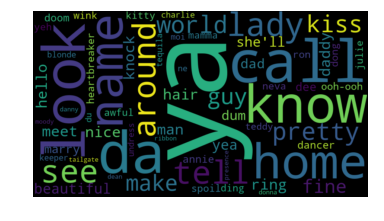

Topic9


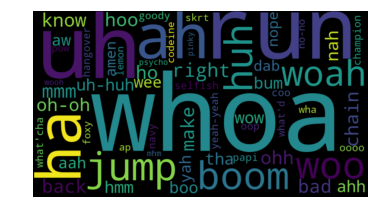

Topic10


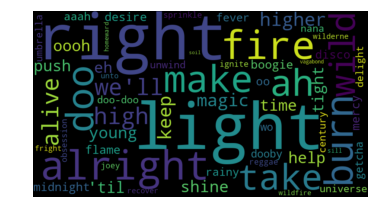

Topic11


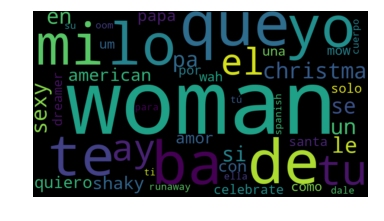

In [55]:
for cat in vis.topic_info.Category.unique():
    print(cat)
    tmp_df = vis.topic_info[vis.topic_info.Category==cat]
    wc = WordCloud(width=900,height=500, max_words=1628,relative_scaling=1,normalize_plurals=False).generate_from_frequencies({r["Term"]:np.log10(r["Freq"]) for i,r in tmp_df.iterrows() if r["Term"] not in most_freq or cat == "Default"})
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    

In [53]:
most_freq = set(vis.topic_info[vis.topic_info.Category=="Default"]["Term"])

In [71]:
cat_2_word_freq = {}
for topic in song_data_df2.Topic.unique():
    tmp_df = song_data_df2[song_data_df2.Topic == topic]
    word_freq = defaultdict(float)
    for i,r in tmp_df.iterrows():
        for w,k in r["Topic_Keywords"]:
            word_freq[k]+=r["Perc_Contribution"]*w
    cat_2_word_freq[topic] = word_freq
word_freq = defaultdict(float)
for i,r in song_data_df2.iterrows():
    for w,k in r["Topic_Keywords"]:
        word_freq[k]+=w*r["Perc_Contribution"]

In [72]:
p_cat_2_word_freq = {}
for k in cat_2_word_freq:
    topic = cat_2_word_freq[k]
    tot_words = sum(topic.values())
    p_cat_2_word_freq[k] = {w:topic[w]/tot_words for w in topic}
tot_n_words = sum(word_freq.values())
p_word_freq = {w:word_freq[w]/tot_n_words for w in word_freq}

In [175]:
relevance = lambda td,w,l: np.log(td[w])*l+(1-l)*np.log(td[w]/p_word_freq[w])
top_30_02 = {}
for k in p_cat_2_word_freq:
    topic = p_cat_2_word_freq[k]
    top_30_02[k]=sorted([(relevance(topic,w,0.2),w) for w in topic],reverse=True)
    print(k)
    print(top_30_02[k][:30])    

7
[(0.4473837583509783, 'nigga'), (0.3677713221190445, 'bitch'), (0.341621809538426, 'fuck'), (0.30516906272134525, 'shit'), (0.16157154044221578, 'gon'), (0.14563635998983915, 'money'), (0.08603874476123163, 'hoe'), (0.07957667281852876, 'pop'), (0.060634708572210316, "'em"), (0.04777104017937095, "i'ma"), (0.039955022223080006, 'wit'), (0.007910871409139153, 'lil'), (0.00776424707173895, "y'all"), (-0.023748396222496027, 'ayy'), (-0.024434754960510396, 'hit'), (-0.03132321718008768, 'pussy'), (-0.03533760241189077, 'gang'), (-0.03917312487974911, 'club'), (-0.04958309509330938, 'tryna'), (-0.07878882450196745, 'dick'), (-0.0807289645806375, 'whip'), (-0.0819924364935618, 'bang'), (-0.0826086335164764, 'bounce'), (-0.08558987544326624, 'hood'), (-0.08873932704567489, 'shawty'), (-0.08986007809776764, 'drop'), (-0.09056255582970085, 'yo'), (-0.10613513372453776, 'dope'), (-0.10840545159781789, 'rap'), (-0.1118591134012803, 'check')]
9
[(2.2426205440609026, 'yeah'), (2.116399119413259, 

In [318]:
def pretty_wordcloud(topic_num,title = ""):
    bott = top_30_02[topic_num][-1][0]
    freq = {w:p-bott for p,w in top_30_02[topic_num] if w not in cat_spec_stop_words[topic_num]}
    wc = WordCloud(background_color='white',width=900,height=500, max_words=50,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(freq)
    plt.imshow(wc, interpolation='bilinear')
    if title:
        #plt.title()
        #plt.suptitle(title,fontsize = 64)
        title_str = title+" (Coherence: {:5.4f})".format(coherence_model.get_coherence_per_topic()[topic_num])
        print(title_str)
        plt.title(title_str,fontsize=32)
    plt.axis("off")
    plt.show()

def pretty_wordcloud2(topic_num):
    freq = {pw[1]:(100000-i)//100 for i,pw in enumerate(top_30_02[topic_num]) if pw[1] not in cat_spec_stop_words[topic_num]}
    wc = WordCloud(background_color='white',width=900,height=500, max_words=250,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(freq)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [295]:
"\\Huge \text{{"+"test"+"}}"

'\\Huge \text{{test}}'

In [306]:
cat_spec_stop_words = defaultdict(set)
i_2_cat_title = defaultdict(str)

      Affection:
Affection (Coherence: 0.3817)


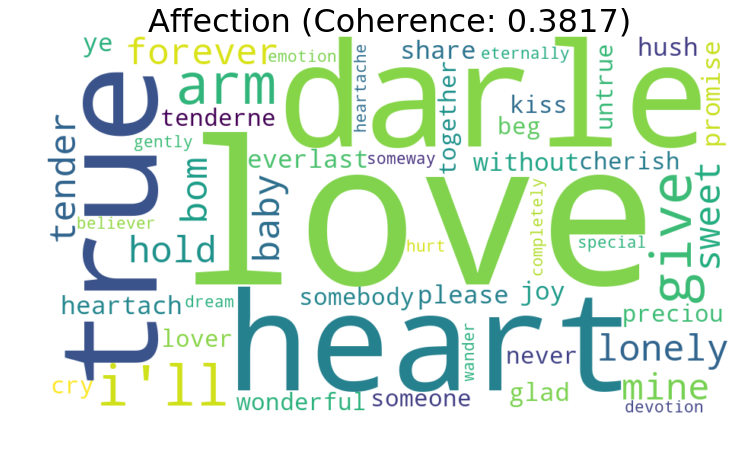

In [323]:
cat_spec_stop_words[2].update({})
print("      Affection:")
pretty_wordcloud(2,"Affection")# Affection
i_2_cat_title[2] = "Affection"

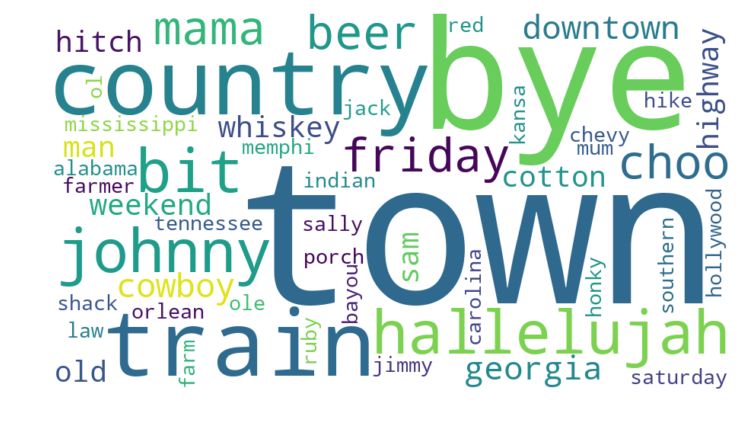

In [307]:
cat_spec_stop_words[1].update({"get","little"})
pretty_wordcloud(1)# country
i_2_cat_title[1] = "Country"

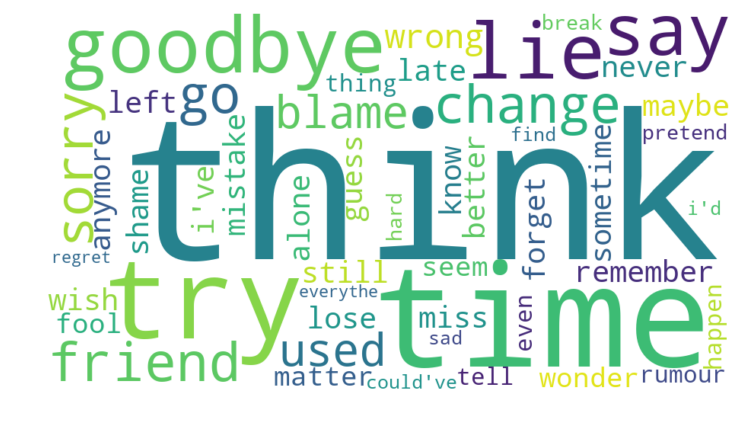

In [308]:
cat_spec_stop_words[3].update({})
pretty_wordcloud(3)# psyche
i_2_cat_title[3] = "Psyche/Regret"

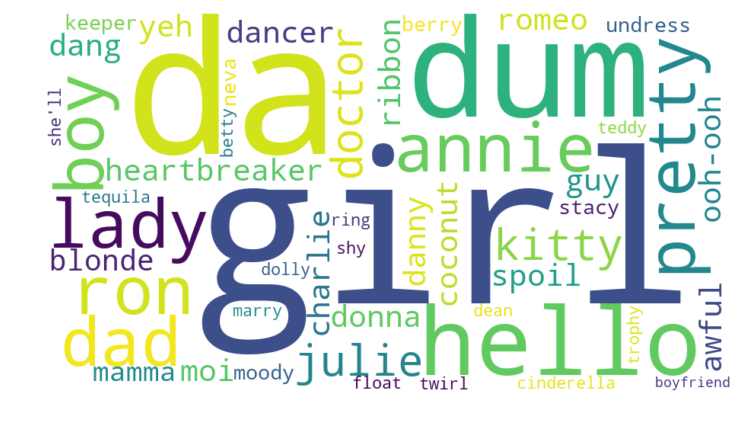

In [309]:
cat_spec_stop_words[4].update({"ding","dee","dong","du","doom"})
pretty_wordcloud(4)# people
i_2_cat_title[4] = "People"

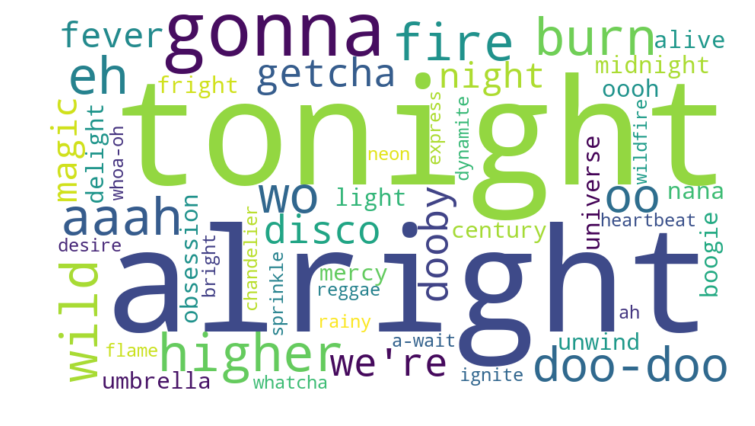

In [310]:
cat_spec_stop_words[5].update({"na","doo"})
pretty_wordcloud(5)# craze/party
i_2_cat_title[5] = "Craze/Party"

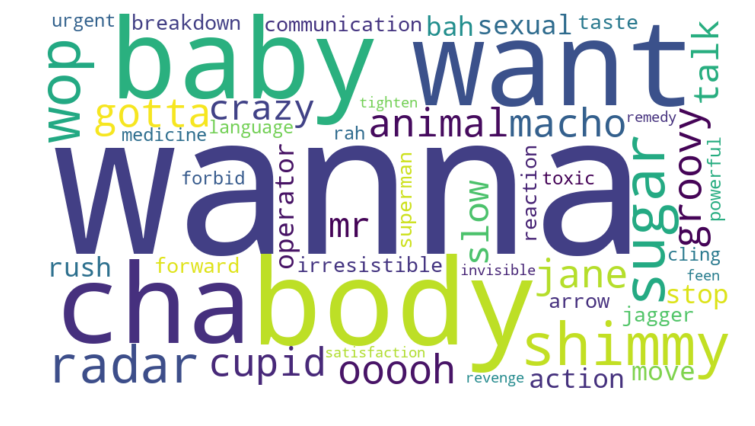

In [322]:
cat_spec_stop_words[6].update({})
pretty_wordcloud(6)# desire
i_2_cat_title[6] = "Desire"

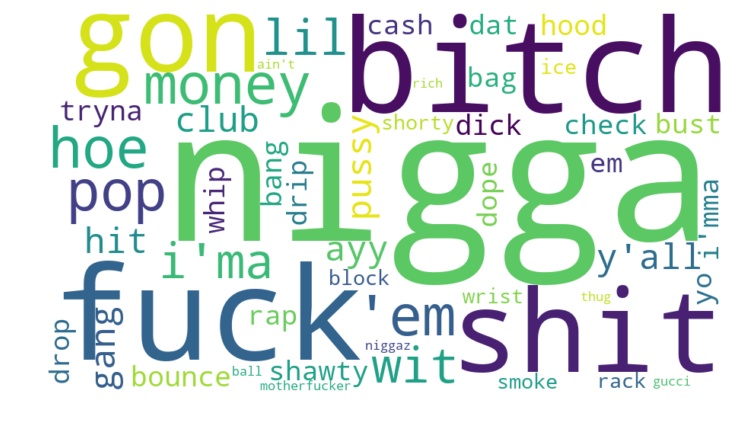

In [311]:
cat_spec_stop_words[7].update({"get","i'm","like"})
pretty_wordcloud(7)# hip-hop
i_2_cat_title[7] = "Hip-Hop"

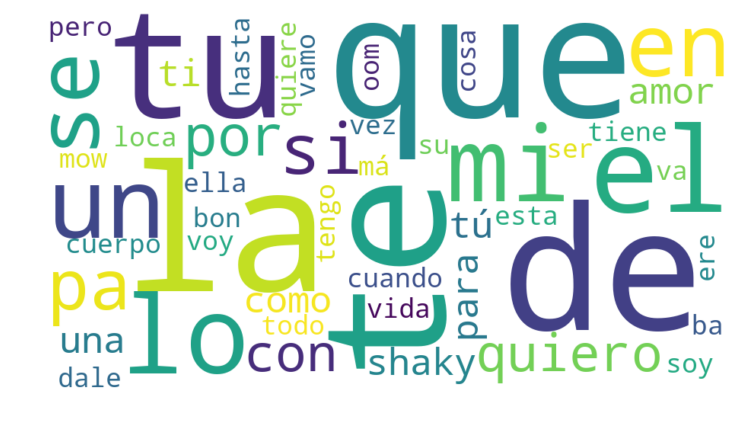

In [313]:
cat_spec_stop_words[8].update({})
pretty_wordcloud(8)# foreign songs
i_2_cat_title[8] = "Foreign Songs"

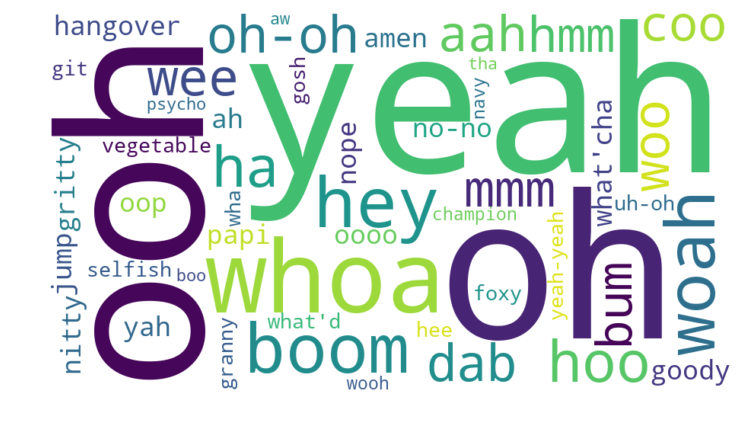

In [314]:
cat_spec_stop_words[9].update({})
pretty_wordcloud(9)# noise/sounds
i_2_cat_title[9] = "Noise/Sounds"

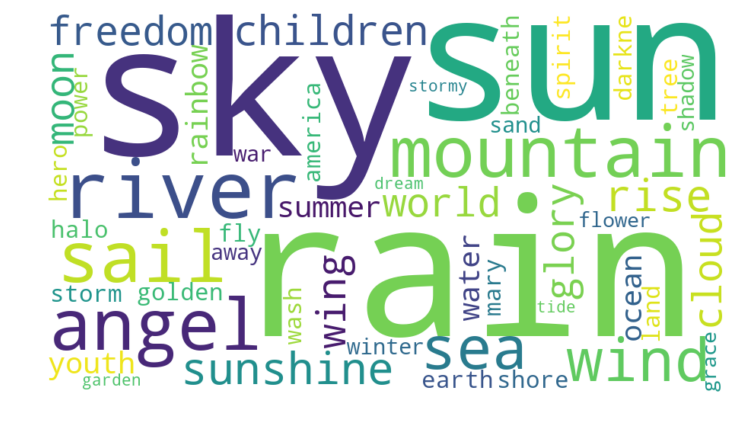

In [315]:
cat_spec_stop_words[10].update({})
pretty_wordcloud(10)# world/earth
i_2_cat_title[10] = "World/Earth"

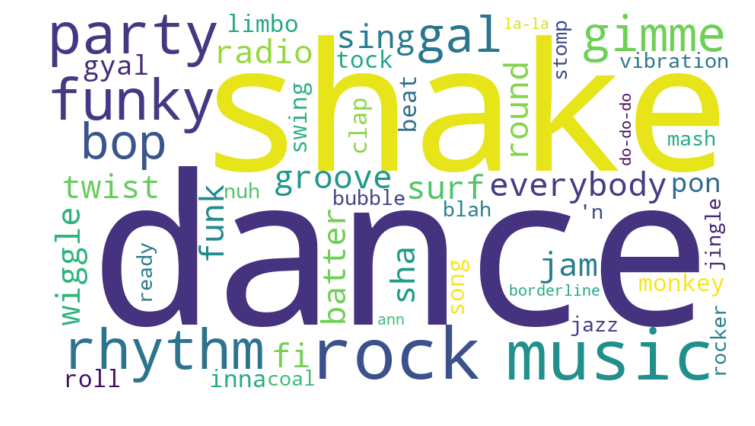

In [321]:
cat_spec_stop_words[0].update({"get","come","let"})
pretty_wordcloud(0)# dance/rhythm
i_2_cat_title[0] = "Dance/Rhythm"

0.7425205898389629
Foreign Songs (Coherence: 0.7425)


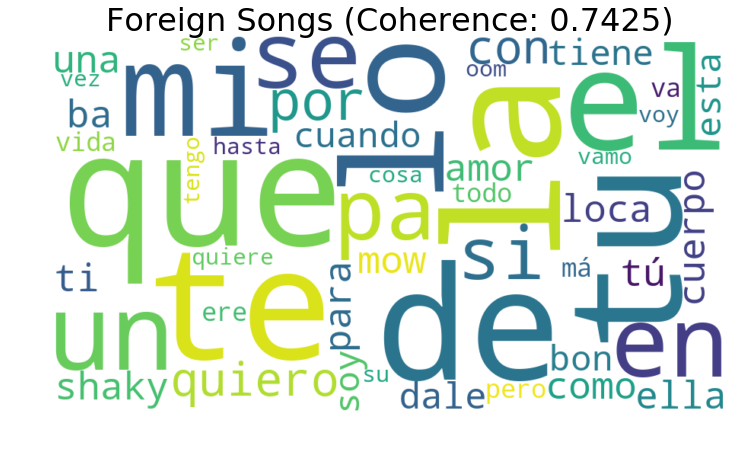

0.4903525817565743
Hip-Hop (Coherence: 0.4904)


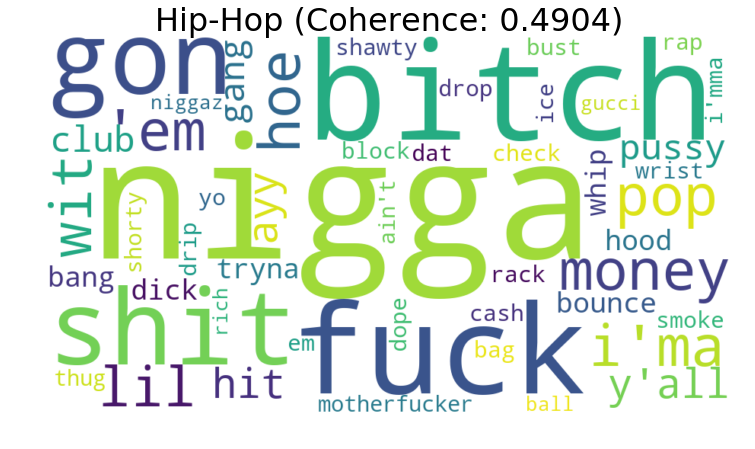

0.4074949353487053
World/Earth (Coherence: 0.4075)


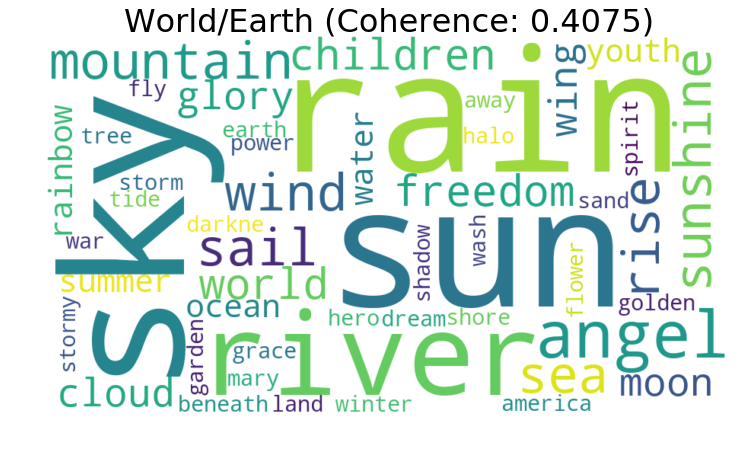

0.40236424909079727
Dance/Rhythm (Coherence: 0.4024)


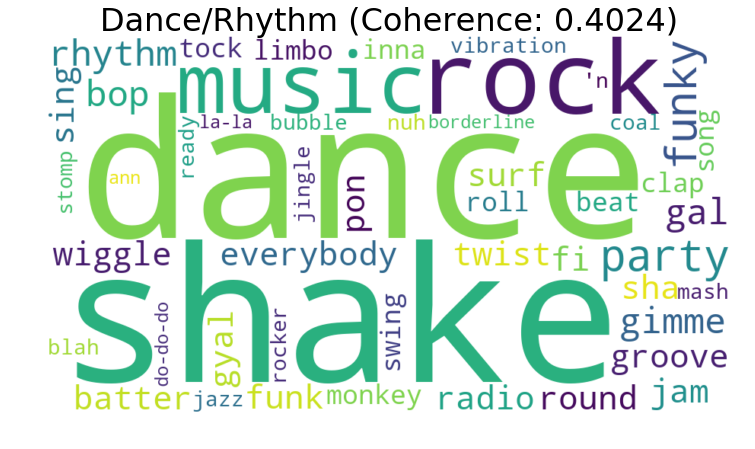

0.38651070667505155
Psyche/Regret (Coherence: 0.3865)


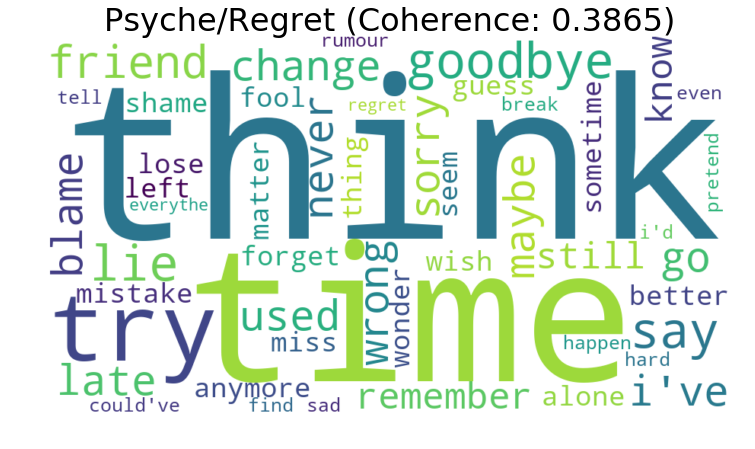

0.38173688017440727


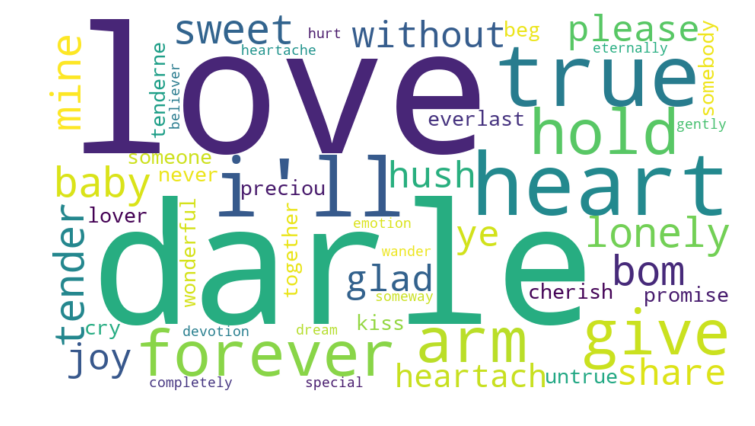

0.3642035488540315


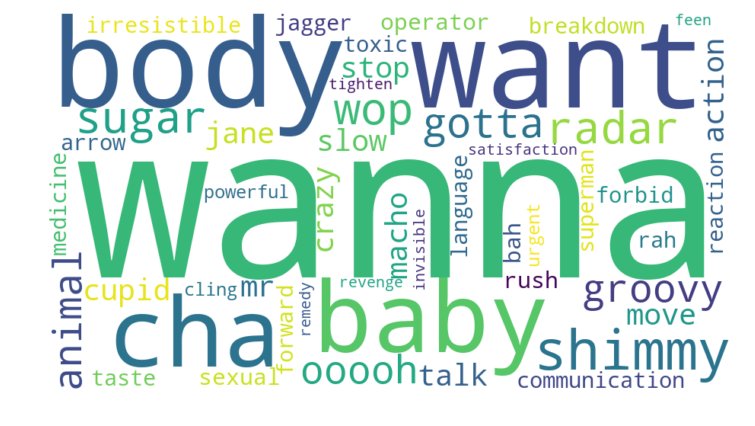

0.3572435412352074
Country (Coherence: 0.3572)


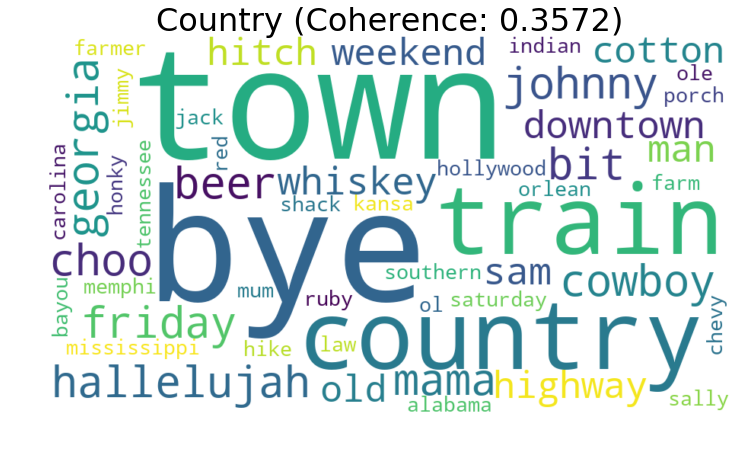

0.3494128077520383
Noise/Sounds (Coherence: 0.3494)


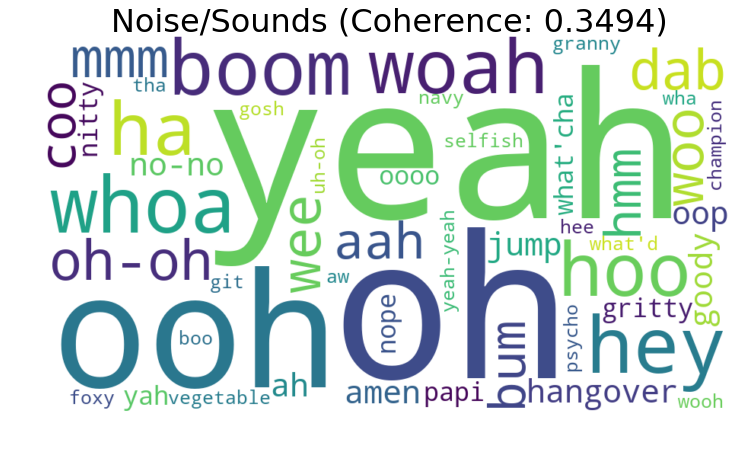

0.34240210575919344
Craze/Party (Coherence: 0.3424)


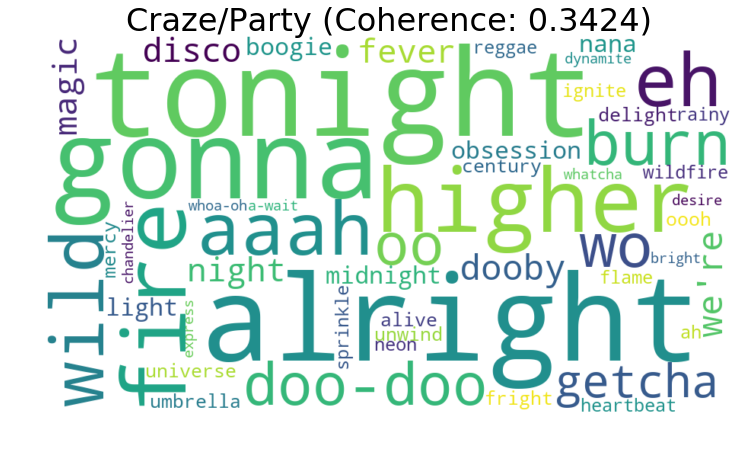

0.3375556150882984
People (Coherence: 0.3376)


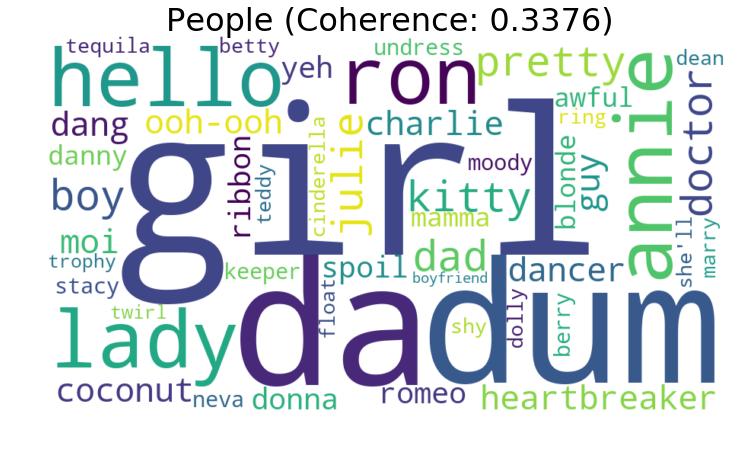

In [319]:
for c,i in sorted(zip(coherence_model.get_coherence_per_topic(),range(11)),reverse=True):
    print(c)
    pretty_wordcloud(i,i_2_cat_title[i])